# Validation MUSE output 

In [1]:
%load_ext nb_black
%matplotlib notebook

<IPython.core.display.Javascript object>

### Import modules 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import numpy as np
from glob import glob
import os

<IPython.core.display.Javascript object>

### Read in all data

In [3]:
class muse_results:
    def __init__(self, name: str, path: str):
        self.name = name
        self.path = path

    def read_in_data(self):

        self.capacity_results = pd.read_csv(
            os.path.join(self.path, "Results/MCACapacity.csv")
        )

        # sort by year
        self.capacity_results = self.capacity_results.sort_values(by="year")

        self.metric_supply_results = pd.read_csv(
            os.path.join(self.path, "Results/MCAMetric_Supply.csv")
        )

        # drop unused column
        self.metric_supply_results = self.metric_supply_results.drop(
            columns="Unnamed: 0"
        )

<IPython.core.display.Javascript object>

In [11]:
path_to_data = "/../../.."

# initialise dictionary
scenarios = {}

# get all scenarios available
list_of_directories = glob(f"{path_to_data}/*")

# loop over all directories
for directory in list_of_directories:
    name_scenario = directory.split("fix/")[-1]
    results = muse_results(name=name_scenario, path=directory)
    results.read_in_data()
    scenarios[name_scenario] = results

<IPython.core.display.Javascript object>

## Averaging over US scenarios

In [9]:
params = {
    "axes.labelsize": 15,
    "axes.titlesize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
}
hfont = {"fontname": "Helvetica"}
plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams.update(params)

<IPython.core.display.Javascript object>

## Scenario conversative & moderate

<IPython.core.display.Javascript object>


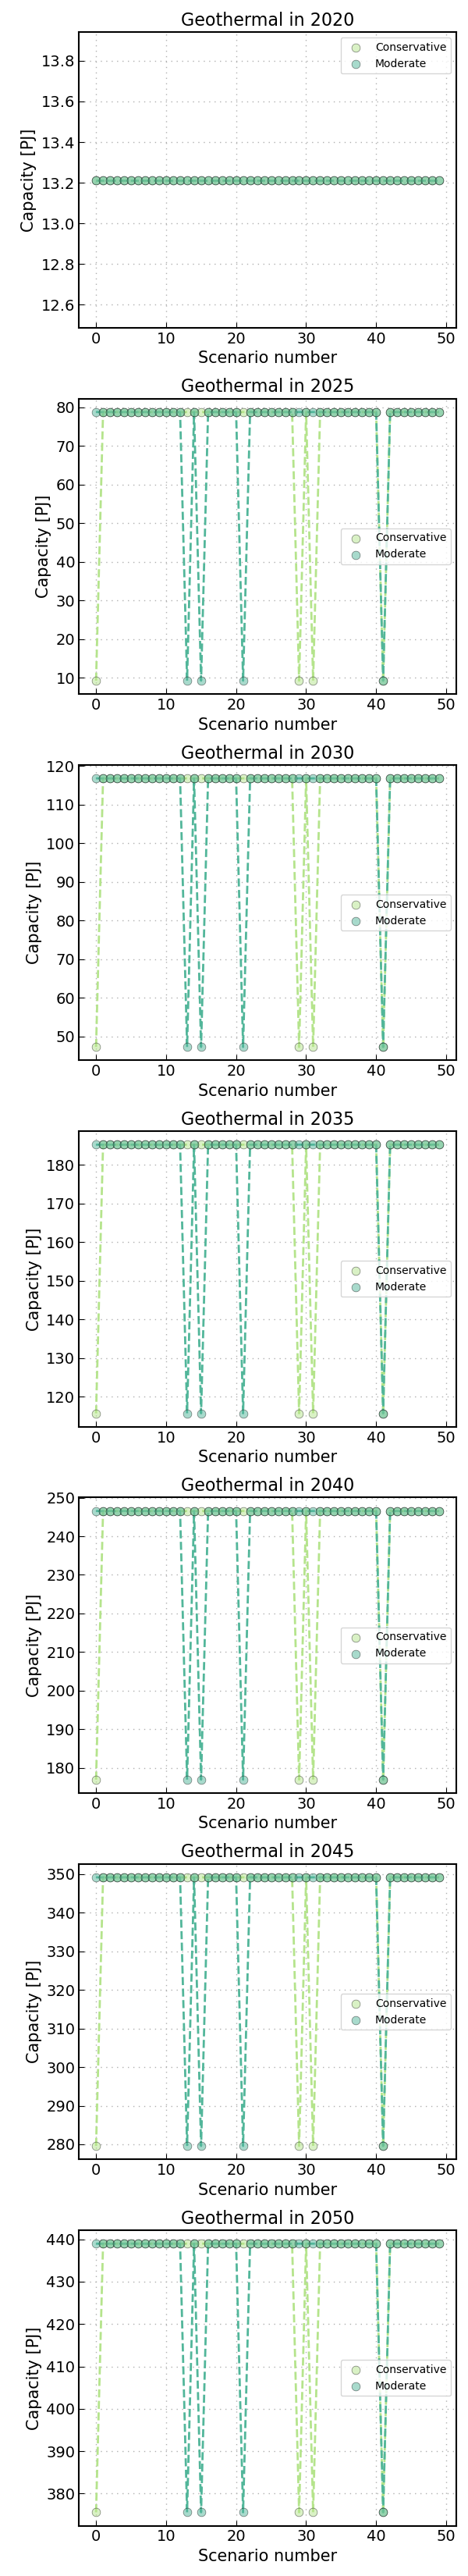

Geothermal Power Plant


<IPython.core.display.Javascript object>

In [61]:
us_scenarios = ["Conservative", "Moderate"]
technologies = scenarios["Moderate_0"].capacity_results.technology.unique().tolist()
years = np.asarray(scenarios["Moderate_0"].capacity_results.year.unique().tolist())
year = ["2050"]

# initialise plot
fig, ax = plt.subplots(len(years), 1, figsize=(6, 33))

# width of bars
width = 1

color_dict = {"Conservative": "#b5e48c", "Moderate": "#52b69a", "Advanced": "#1e6091"}
color_dict_errorbar = {
    "Conservative": "#003566",
    "Moderate": "#003566",
    "Advanced": "#003566",
}

# loop over technologies
for count_tech, tech in enumerate(["Geothermal Power Plant"]):
    print(tech)
    # loop over scenarios
    results_per_tech_per_scenario = {}
    for count_scenarios, us_scenario in enumerate(us_scenarios):

        results_us_scenario = np.asarray(
            [
                results.capacity_results[results.capacity_results.technology == tech]
                .groupby("year")
                .capacity.sum()
                .tolist()
                for name, results in scenarios.items()
                if us_scenario in name
            ]
        )

        for i in np.arange(results_us_scenario.shape[1]):

            ax[i].plot(
                np.arange(len(results_us_scenario)),
                results_us_scenario[:, i],
                color=color_dict[us_scenario],
                lw=2,
                ls="dashed",
            )

            ax[i].scatter(
                np.arange(len(results_us_scenario)),
                results_us_scenario[:, i],
                color=color_dict[us_scenario],
                label=us_scenario,
                ec="k",
                lw=0.5,
                zorder=20,
                s=60,
                alpha=0.5,
            )

            # layout
            ax[i].set_title(f"Geothermal in {years[i]}")
            ax[i].set_xlabel("Scenario number")
            ax[i].set_ylabel("Capacity [PJ]")
            ax[i].grid(which="major", ls="dashed", dashes=(1, 4), lw=1.0, zorder=0)
            ax[i].tick_params(direction="in", which="minor", length=5)
            ax[i].tick_params(direction="in", which="major", length=5)
            ax[i].legend(frameon=True, loc="best")

plt.legend()
plt.tight_layout()

In [151]:
plt.savefig("scenario_X.png", bbox_inches="tight", dpi=600)

<IPython.core.display.Javascript object>